In [1]:

#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import plotly.express as px


In [2]:

#read Education csv file and review the sample rows
edu_data = pd.read_csv("Resources/EducationReport.csv")
#create a new dataframe with only needed columns for years 2014-2018
edu_data_df = pd.DataFrame(edu_data)
edu_data_mycolm = edu_data_df[["Unnamed: 0", "Total.4", "Urban.4", "Rural.4"]]
#renamed the columns to have more meaningful names
edu_data_upd = edu_data_mycolm.rename(columns={"Unnamed: 0" : "area_name", "Total.4" : "Total Edu 2014-18", "Urban.4" : "Total Edu Urban 2024-18", "Rural.4" : "Total Edu Rural 2014-18"})
#dropped the first row of the data set with column titles for consistency
edu_data_final = edu_data_upd.drop([0,1], axis=0)
edu_data_final.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18
2,Alabama,24.90%,28.00%,15.20%
3,Alaska,29.20%,31.80%,23.90%
4,Arizona,28.90%,29.60%,15.80%


In [43]:
edu_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 55
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   area_name                53 non-null     object
 1   Total Edu 2014-18        52 non-null     object
 2   Total Edu Urban 2024-18  52 non-null     object
 3   Total Edu Rural 2014-18  48 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [44]:
# custom function taken from https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float
edu_data_final['Total Edu 2014-18'] = edu_data_final['Total Edu 2014-18'].str.rstrip('%').astype('float') / 100.0
edu_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 55
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_name                53 non-null     object 
 1   Total Edu 2014-18        52 non-null     float64
 2   Total Edu Urban 2024-18  52 non-null     object 
 3   Total Edu Rural 2014-18  48 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


In [45]:
unempl_data = pd.read_csv("Resources/Unemployment.csv", encoding="ISO-8859-1")


In [46]:
#create the column with average data for years 2014-18 and add it to the dataset
unempl_data["Average Unempl 2014-18"] =(unempl_data["Unemployment_rate_2018"] + unempl_data["Unemployment_rate_2017"]
+ unempl_data["Unemployment_rate_2016"] + unempl_data["Unemployment_rate_2015"] + 
unempl_data["Unemployment_rate_2014"])/4
unempl_data.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.100
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.725
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,720","20,846",874,4.0,...,"25,261",935,3.6,"26,172","25,458",714,2.7,"59,338",119.0,5.850


In [50]:
#filter dataset to the state level - remove counties (the columns "rural urban code" & "metro 2013" are empty for the states)
unempl_data['Rural_urban_continuum_code_2013'].replace('', np.nan, inplace=True)
unempl_state_interim = unempl_data[unempl_data['Rural_urban_continuum_code_2013'].isnull()]
unempl_state_interim
unempl_data_clean = unempl_state_interim[unempl_state_interim['Metro_2013']!=0]
unempl_data_clean.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.100
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.725
69,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"329,901","22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.550


In [51]:
#pick the average column for years 2014-2018
unempl_data_mycolm = unempl_data_clean[["area_name", "Average Unempl 2014-18"]]
unempl_data_mycolm.head(3)

,area_name,Average Unempl 2014-18
0,United States,6.100
1,Alabama,6.725
69,Alaska,8.550


In [65]:
# Kamran poverty work
load_poverty = ("Resources/PovertyReport.csv")
poverty_df = pd.read_csv(load_poverty)
poverty_df = poverty_df.drop(columns={"Textbox98", "Textbox99", "total_est_pct_Bmin2",
                                     "total_est_pct_Bmax2", "under18_pct_Bmin2", "under18_pct_Bmax2"})
poverty_df = poverty_df.rename(columns={"state_National": "area_name",
                                       "total_est_pct2": "Poverty (2018)",
                                       "under18_pct2": "Under 18 in Poverty (2018)"})
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.8,23.9
1,Alaska,11.1,14.5
2,Arizona,14.1,20.4


In [66]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area_name                   52 non-null     object 
 1   Poverty (2018)              52 non-null     float64
 2   Under 18 in Poverty (2018)  52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [67]:
#formatting the dataset - add the "%" signs
poverty_df["Poverty (2018)"] = poverty_df["Poverty (2018)"]/100
poverty_df["Under 18 in Poverty (2018)"] = poverty_df["Under 18 in Poverty (2018)"]/100
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,0.168,0.239
1,Alaska,0.111,0.145
2,Arizona,0.141,0.204


In [68]:
#add and read the hate crime file
hate_crime = ("Resources/hate_crimes538.csv")
hate_crime_df = pd.read_csv(hate_crime)
hate_crime_df.head(3)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


In [69]:
#pick the needed columns from the hate crime file
hate_crime_colm = hate_crime_df[["state", "median_household_income", "hate_crimes_per_100k_splc"]]
hate_crime_colm = hate_crime_colm.rename(columns={"state" : "area_name"})
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,42278,0.125839
1,Alaska,67629,0.143740
2,Arizona,49254,0.225320


In [70]:
# Merge the Education Dataframe with Enemployment Dataframe
merged_df = pd.merge(edu_data_final,unempl_data_mycolm, on="area_name")
merged_df.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18
0,Alabama,0.249,28.00%,15.20%,6.725
1,Alaska,0.292,31.80%,23.90%,8.550
2,Arizona,0.289,29.60%,15.80%,6.950


In [71]:
#add Poverty Dataframe to the merged data
merged_df1 = pd.merge(merged_df, poverty_df, on="area_name")
merged_df1.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,0.249,28.00%,15.20%,6.725,0.168,0.239
1,Alaska,0.292,31.80%,23.90%,8.550,0.111,0.145
2,Arizona,0.289,29.60%,15.80%,6.950,0.141,0.204


In [72]:
#ready for the final code
#add the Hate Crime data to the merged dataframe

merged_df_fin = pd.merge(merged_df1,hate_crime_colm, on="area_name")
merged_df_fin.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc
0,Alabama,0.249,28.00%,15.20%,6.725,0.168,0.239,42278,0.125839
1,Alaska,0.292,31.80%,23.90%,8.550,0.111,0.145,67629,0.143740
2,Arizona,0.289,29.60%,15.80%,6.950,0.141,0.204,49254,0.225320


In [73]:
#read Education csv file and review the sample rows
region_data= pd.read_csv("Resources/Regions.csv")
region_data.head()

,area_name,region
0,Alabama,Southeast
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,Southeast
4,California,West


In [74]:
# occurrence of Hate Crimes to Education (Bachelor's Degree vs. High School) by State
final_merge=pd.merge(merged_df_fin,region_data, on="area_name")
final_merge.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,0.249,28.00%,15.20%,6.725,0.168,0.239,42278,0.125839,Southeast
1,Alaska,0.292,31.80%,23.90%,8.550,0.111,0.145,67629,0.143740,West
2,Arizona,0.289,29.60%,15.80%,6.950,0.141,0.204,49254,0.225320,Southwest


In [75]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area_name                   51 non-null     object 
 1   Total Edu 2014-18           51 non-null     float64
 2   Total Edu Urban 2024-18     51 non-null     object 
 3   Total Edu Rural 2014-18     47 non-null     object 
 4   Average Unempl 2014-18      51 non-null     float64
 5   Poverty (2018)              51 non-null     float64
 6   Under 18 in Poverty (2018)  51 non-null     float64
 7   median_household_income     51 non-null     int64  
 8   hate_crimes_per_100k_splc   47 non-null     float64
 9   region                      51 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.4+ KB


In [76]:
# final_merged=final_merge.dropna(subset = ["hate_crimes_per_100k_splc"], inplace=True)
# final_merged.head()

In [77]:
# group by regions
region_merge=final_merge.groupby("region")
region_merge.head(2)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,0.249,28.00%,15.20%,6.725,0.168,0.239,42278,0.125839,Southeast
1,Alaska,0.292,31.80%,23.90%,8.550,0.111,0.145,67629,0.143740,West
2,Arizona,0.289,29.60%,15.80%,6.950,0.141,0.204,49254,0.225320,Southwest
3,Arkansas,0.226,26.80%,16.00%,5.575,0.168,0.238,44922,0.069061,Southeast
4,California,0.333,33.50%,23.20%,7.025,0.128,0.174,60487,0.255805,West
6,Connecticut,0.389,39.20%,35.10%,6.625,0.103,0.138,70161,0.335392,Northeast
7,Delaware,0.314,31.40%,NaN,5.875,0.122,0.176,57522,0.322754,Northeast
13,Illinois,0.341,36.20%,18.30%,7.025,0.121,0.162,54916,0.195345,Midwest
14,Indiana,0.259,28.70%,16.40%,5.625,0.130,0.175,48060,0.247009,Midwest
31,New Mexico,0.271,30.70%,19.70%,7.775,0.188,0.253,46686,0.294811,Southwest


In [78]:
count_region=region_merge["hate_crimes_per_100k_splc"].mean()
count_region

region
Midwest      0.283501
Northeast    0.407100
Southeast    0.181589
Southwest    0.216836
West         0.355369
Name: hate_crimes_per_100k_splc, dtype: float64

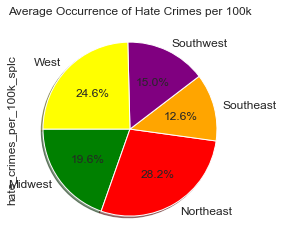

In [22]:
# Look at occurences of Hate Crimes across regions
count_region.plot(kind='pie', y='region', \
                        title="Average Occurrence of Hate Crimes per 100k",startangle=180,\
                        autopct='%1.1f%%',shadow=True, fontsize=12, colors =["green","red", "orange","purple", "yellow"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.show()

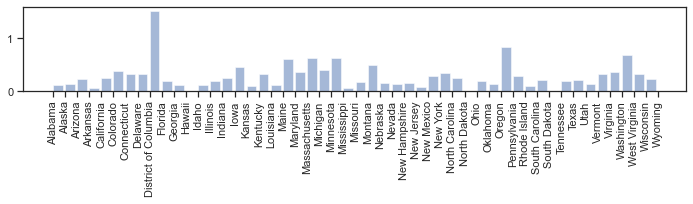

In [23]:

x_axis=final_merge["area_name"]
tick_locations=x_axis
y_axis =final_merge['hate_crimes_per_100k_splc']
plt.figure(figsize=(10,3))
plt.bar(x_axis, y_axis, color="b",  alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
# plt.show()

In [24]:
# region_df["Poverty (2018)"]=pd.to_numeric(region_df["Poverty (2018)"], errors='coerce')


In [25]:
region_df=final_merge.groupby(['region'])
region_df.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.725,16.80%,23.90%,42278,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.550,11.10%,14.50%,67629,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.950,14.10%,20.40%,49254,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,5.575,16.80%,23.80%,44922,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,7.025,12.80%,17.40%,60487,0.255805,West
5,Colorado,40.10%,41.40%,31.80%,4.575,9.70%,12.10%,60940,0.390523,West
6,Connecticut,38.90%,39.20%,35.10%,6.625,10.30%,13.80%,70161,0.335392,Northeast
7,Delaware,31.40%,31.40%,NaN,5.875,12.20%,17.60%,57522,0.322754,Northeast
8,District of Columbia,57.60%,57.60%,NaN,8.175,16.10%,24.50%,68277,1.522302,Northeast
9,Florida,29.20%,29.70%,14.50%,6.225,13.70%,20.00%,46140,0.187521,Southeast


In [26]:
# x=pd.to_numeric(region_df["Poverty (2018)"],downcast="signed", errors='coerce')



In [27]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area_name                   51 non-null     object 
 1   Total Edu 2014-18           51 non-null     object 
 2   Total Edu Urban 2024-18     51 non-null     object 
 3   Total Edu Rural 2014-18     47 non-null     object 
 4   Average Unempl 2014-18      51 non-null     float64
 5   Poverty (2018)              51 non-null     object 
 6   Under 18 in Poverty (2018)  51 non-null     object 
 7   median_household_income     51 non-null     int64  
 8   hate_crimes_per_100k_splc   47 non-null     float64
 9   region                      51 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.4+ KB


In [28]:
# pd.to_numeric(region_df["Total Edu 2014-18"], errors='coerce')
# region_df['Total Edu 2014-18'] = region_df['Total Edu 2014-18'].str.rstrip('%').astype('float') / 100.0



In [29]:
region_df.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.725,16.80%,23.90%,42278,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.550,11.10%,14.50%,67629,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.950,14.10%,20.40%,49254,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,5.575,16.80%,23.80%,44922,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,7.025,12.80%,17.40%,60487,0.255805,West
5,Colorado,40.10%,41.40%,31.80%,4.575,9.70%,12.10%,60940,0.390523,West
6,Connecticut,38.90%,39.20%,35.10%,6.625,10.30%,13.80%,70161,0.335392,Northeast
7,Delaware,31.40%,31.40%,NaN,5.875,12.20%,17.60%,57522,0.322754,Northeast
8,District of Columbia,57.60%,57.60%,NaN,8.175,16.10%,24.50%,68277,1.522302,Northeast
9,Florida,29.20%,29.70%,14.50%,6.225,13.70%,20.00%,46140,0.187521,Southeast


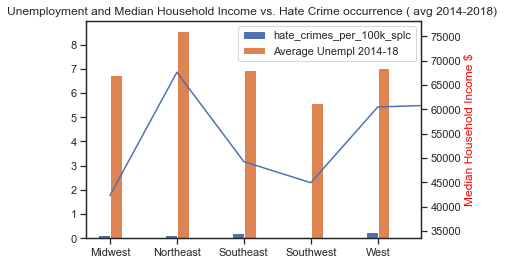

In [30]:
width = .35 # width of a bar

final_merge[['hate_crimes_per_100k_splc','Average Unempl 2014-18']].plot(kind='bar', width = width)
final_merge['median_household_income'].plot(secondary_y=True)
plt.ylabel('Average Unemplopyed %')

ax = plt.gca()
plt.xlim([-width, len(region_df)-width])
ax.set_xticklabels(count_region.index)
# Create a title, x label, and y label for our chart
ax.set_title("Unemployment and Median Household Income vs. Hate Crime occurrence ( avg 2014-2018) ")
ax.set_ylabel('Median Household Income $', color="red")

plt.show()

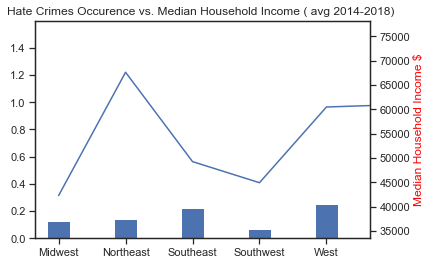

In [34]:
width = .35 # width of a bar

final_merge['hate_crimes_per_100k_splc'].plot(kind='bar', width = width)
final_merge['median_household_income'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(region_df)-width])
ax.set_xticklabels(count_region.index)
# Create a title, x label, and y label for our chart
ax.set_title("Hate Crimes Occurence vs. Median Household Income ( avg 2014-2018) ")
ax.set_ylabel('Median Household Income $', color="red")


plt.show()

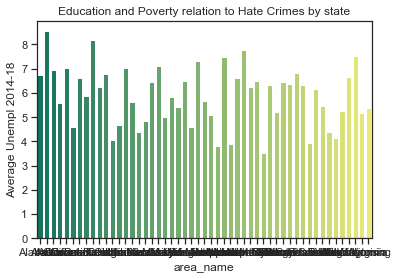

In [36]:
#create bar plot for average temps by month
plt.title('Education and Poverty relation to Hate Crimes by state')
sns.barplot(x='area_name', y='Average Unempl 2014-18',data=final_merge, palette='summer')

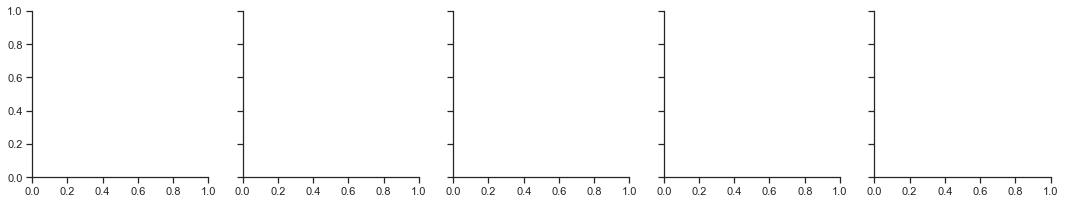

In [39]:
sns.FacetGrid(final_merge, col="region")
plt.show()


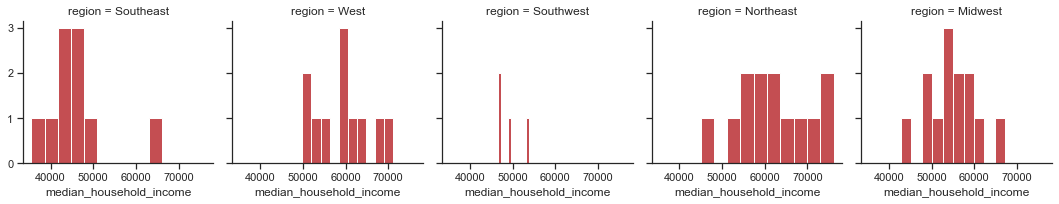

In [82]:
g=sns.FacetGrid(final_merge, col="region")
g=g.map(plt.hist, "median_household_income", color="r")
plt.show()
# yaxis is showing number of states, while x is showing median household income

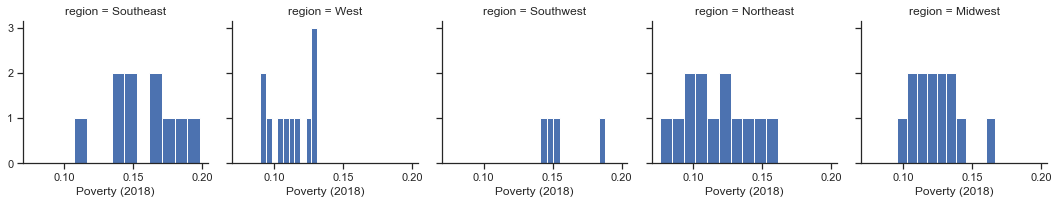

In [79]:
z=sns.FacetGrid(final_merge, col="region")
z=z.map(plt.hist, "Poverty (2018)")
plt.show()
# yaxis is showing number of states, while x is showing median household income

In [ ]:
fig = px.choropleth(final_merge,  # Input Pandas DataFrame
                    locations="area_name",  # DataFrame column with locations
                    color="hate_crimes_per_100k_splc",  # DataFrame column with color values
                    color_continuous_scale="Blues",
                    hover_name="area_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
colorscale = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
#     autocolorscale = True,
#     colorscale = "sequential", 
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

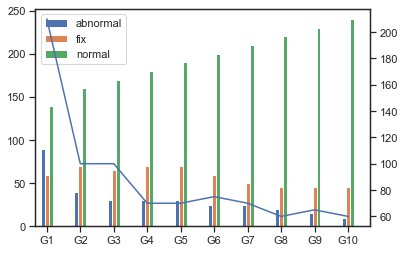

In [35]:
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30,30,25,25,20,15,10],
 'fix' : [60,70,65,70,70,60,50,45,45,45],
 'normal' : [140,160,170,180,190,200,210,220,230,240],
 'bad_rate' : [210,100,100,70,70,75,70,60,65,60]})

m1_t[['abnormal','fix','normal']].plot(kind='bar', width = width)
m1_t['bad_rate'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'))

plt.show()
